# GrassCheck NI

<https://agrisearch.org/grasscheck>

Huson, K. M., Lively, F. O., Aubry, A., Takahashi, T., Gordon, A. and
McDonnell, D. A. (2020).
'GrassCheck: monitoring grass growth and maximizing grass utilisation on UK
farms',
in Virkajärvi, P. et al. (eds),
*Meeting the future demands for grassland production*,
Grassland Science in Europe, Helsinki, Finland, European Grassland Federation,
vol. 25, pp. 716–718. [Online]. Available at
<https://www.europeangrassland.org/fileadmin/documents/Infos/Printed_Matter/Proceedings/EGF2020.pdf>
(Accessed 13 September 2022).

In [1]:
import os
from datetime import datetime, timezone
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
print("Last updated:", datetime.now(tz=timezone.utc))

Last updated: 2022-10-16 00:21:42.774579+00:00


In [3]:
DATA_DIR = os.path.join("data", "grass-growth", "grasscheck", "grasscheck.ods")

In [4]:
grass_ni = pd.read_excel(DATA_DIR, parse_dates=["week"])

In [5]:
grass_ni.head()

,week,derry,antrim,down,armagh,fermanagh,tyrone
0,2017-04-03,26.7,17.7,24.4,17.8,27.4,18.9
1,2017-04-10,36.0,30.0,39.0,42.0,37.0,27.0
2,2017-04-17,38.4,54.8,41.1,47.7,47.5,42.3
3,2017-04-24,56.0,52.0,55.0,53.0,56.0,56.0
4,2017-05-01,35.8,35.7,63.7,73.4,36.0,55.1


In [6]:
grass_ni.shape

(183, 7)

In [7]:
# use weekly time series starting on Monday to fill missing rows
grass_ts = pd.DataFrame(
    pd.date_range(
        str(grass_ni["week"][0].year) + "-01-01",
        str(grass_ni["week"][len(grass_ni) - 1].year) + "-12-31",
        freq="W-MON"
    ),
    columns=["week"]
)

In [8]:
grass_ts = pd.merge(grass_ts, grass_ni, how="outer")

In [9]:
grass_ts.head()

,week,derry,antrim,down,armagh,fermanagh,tyrone
0,2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-16,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-23,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-30,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
grass_ts.shape

(313, 7)

In [11]:
DATA_DIR = os.path.join(
    "data", "grass-growth", "grasscheck", "grasscheck.csv"
)

In [12]:
# save time series
grass_ts.to_csv(DATA_DIR, index=False)

In [13]:
# set timestamps as the index
grass_ts.index = grass_ts["week"]

In [14]:
grass_ts.drop(columns=["week"], inplace=True)

In [15]:
# capitalise county names
counties = []
for c in list(grass_ts):
    counties.append(c.capitalize())

In [16]:
grass_ts.columns = counties

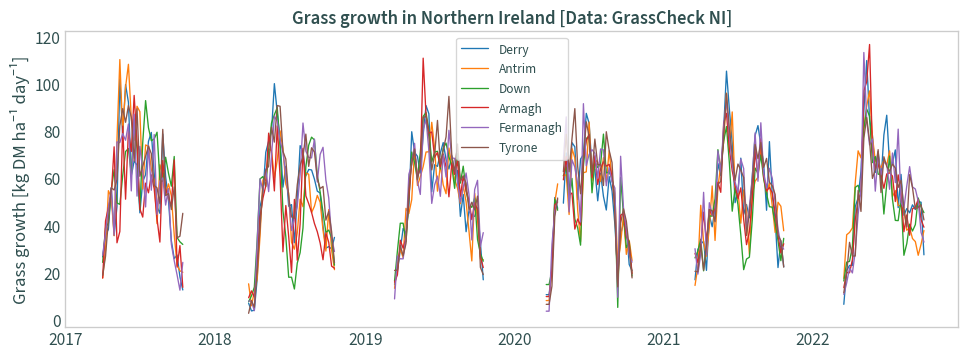

In [17]:
grass_ts.plot(figsize=(12, 4), linewidth=1)
plt.title("Grass growth in Northern Ireland [Data: GrassCheck NI]")
plt.xlabel("")
plt.ylabel("Grass growth [kg DM ha⁻¹ day⁻¹]")
plt.show()

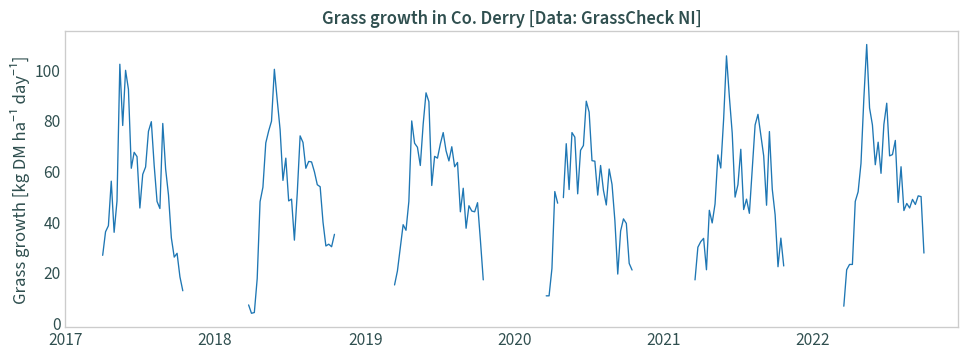

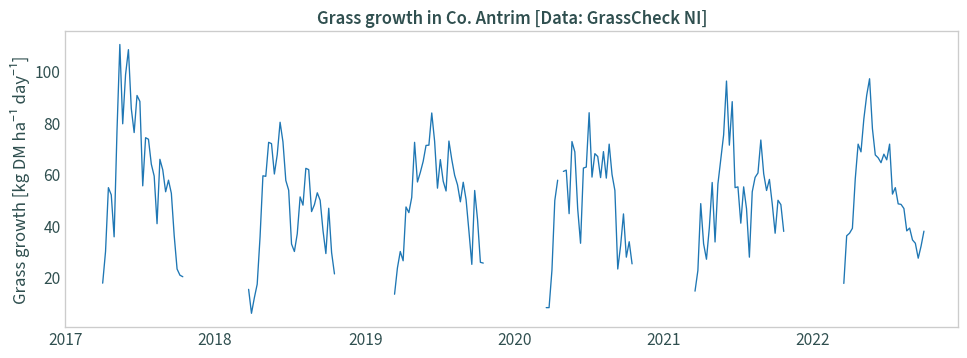

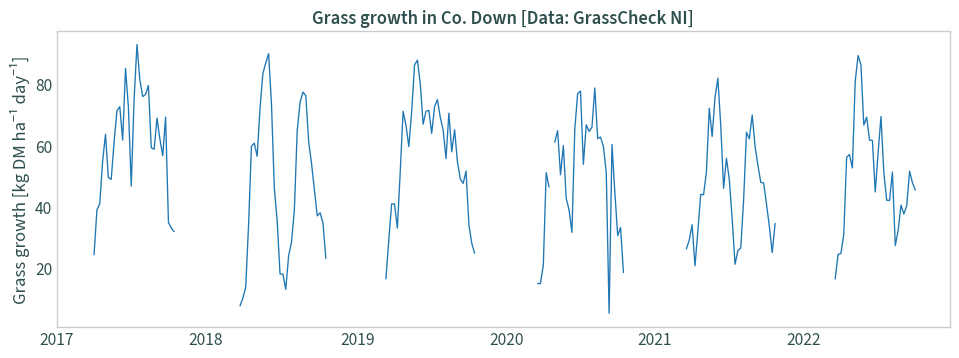

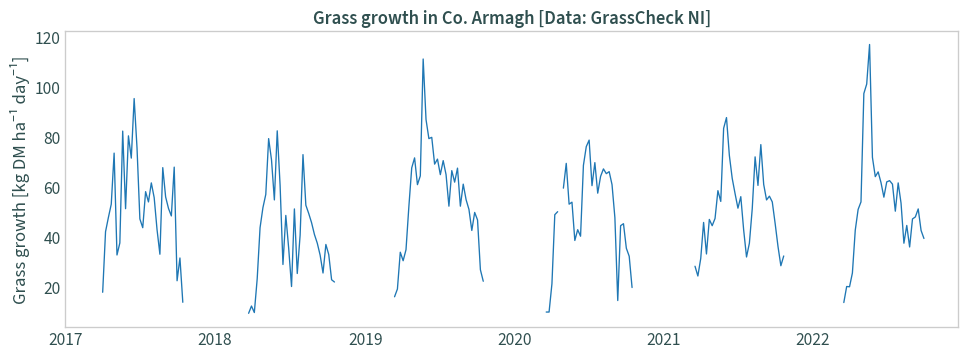

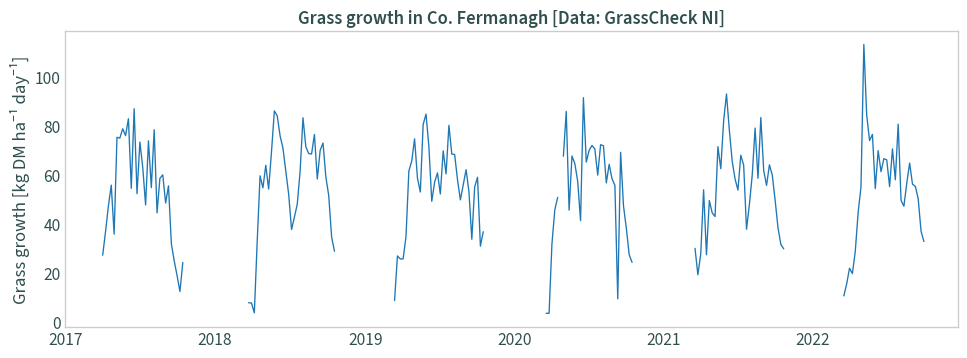

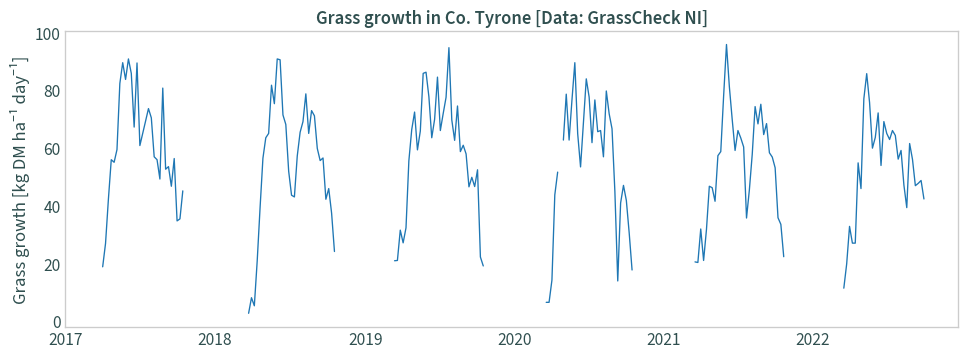

In [18]:
for c in counties:
    grass_ts[c].plot(figsize=(12, 4), linewidth=1)
    plt.title(f"Grass growth in Co. {c} [Data: GrassCheck NI]")
    plt.xlabel("")
    plt.ylabel("Grass growth [kg DM ha⁻¹ day⁻¹]")
    plt.show()

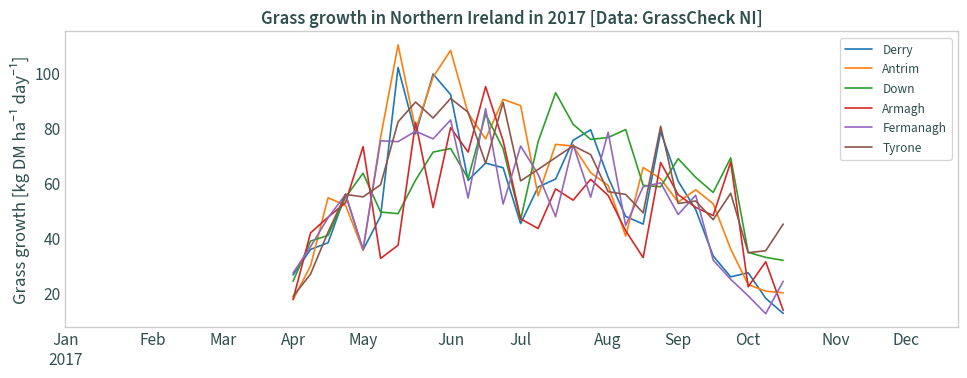

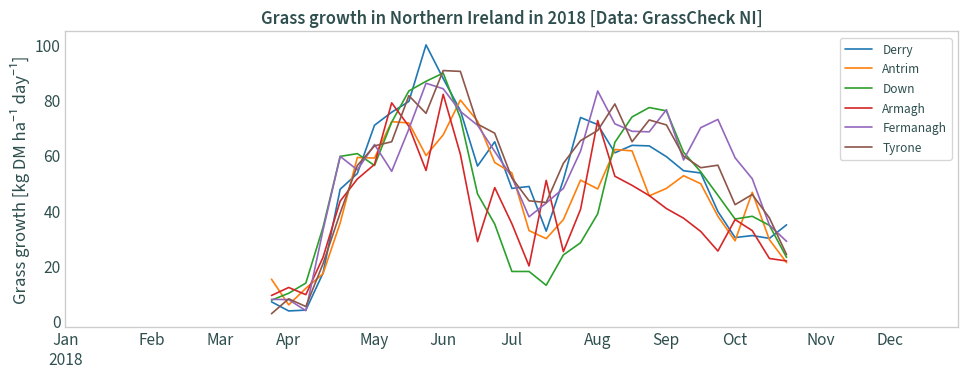

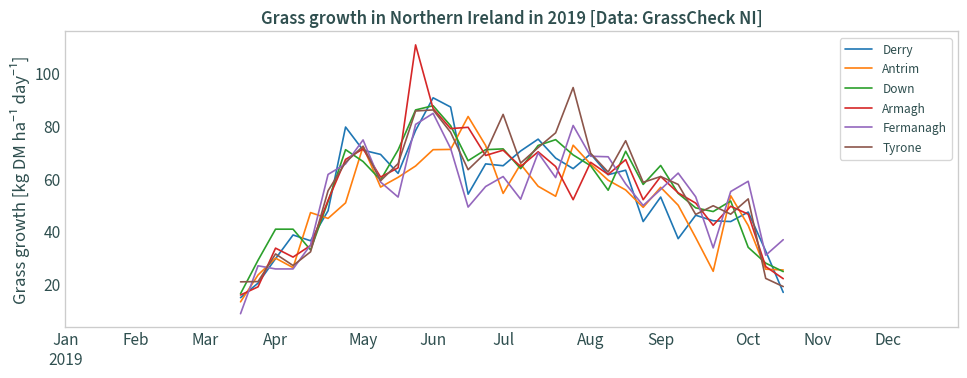

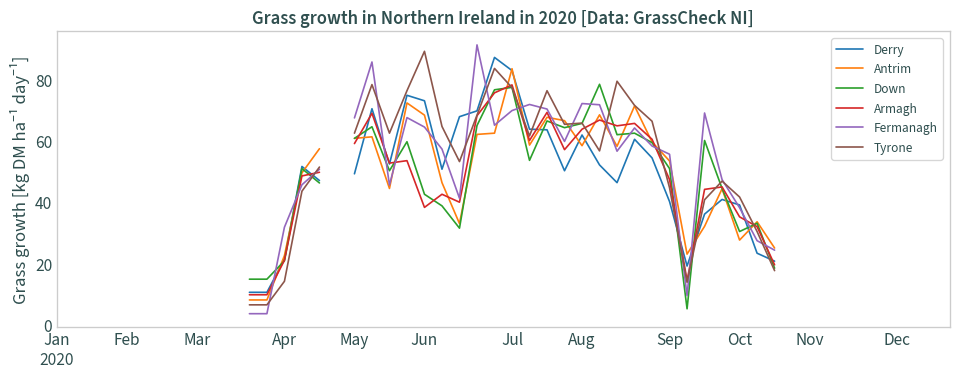

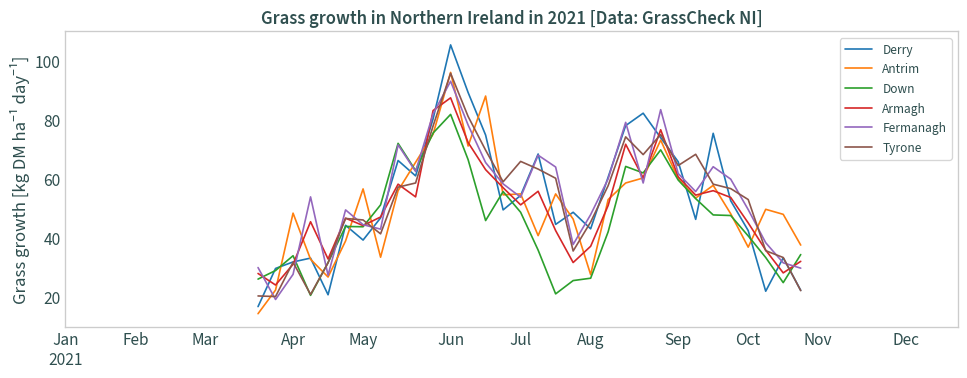

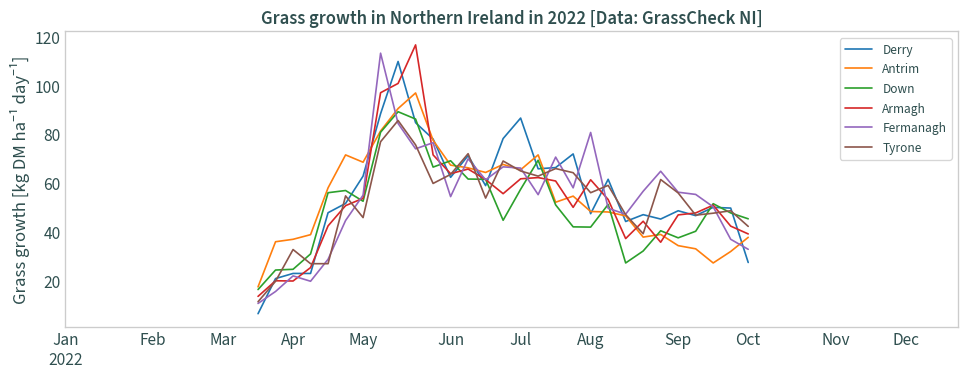

In [19]:
years = list(grass_ts.index.year.unique())
for y in years:
    grass_ts.loc[str(y)].plot(figsize=(12, 4), linewidth=1.25)
    plt.title(f"Grass growth in Northern Ireland in {y} [Data: GrassCheck NI]")
    plt.xlabel("")
    plt.ylabel("Grass growth [kg DM ha⁻¹ day⁻¹]")
    plt.show()